In [972]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stylecloud

In [846]:
tweet_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [847]:
tweet_data=tweet_data.drop('tweet_id',axis=1)
tweet_data.dropna(axis=0,inplace=True)

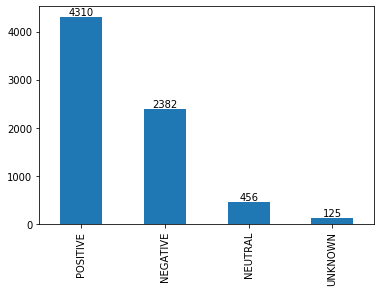

In [848]:
no_of_tweets=tweet_data['sentiment'].value_counts()
no_of_tweets.plot(kind='bar').set_xticklabels(['POSITIVE','NEGATIVE','NEUTRAL','UNKNOWN'])
for i,n in enumerate(no_of_tweets,0):
    plt.text(i,n,n,horizontalalignment='center',verticalalignment='bottom')

In [849]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works fo\r me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [865]:
negation_dic={"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"pls":"please",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"ya'll":"you all",
"w/out":"workout"
}

In [880]:
def clean_tweet(tweet):
    tweet=re.sub(r'((w{3,}\.|https?|bit\.ly|[^\s]+\.(co|com)).[^\s]*|{link})',' ',tweet)
    tweet=re.sub(r'([a-zA-Z])\1{2,}',r'\1',tweet)
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' happy ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' happy ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' happy ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' happy ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' sad ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' sad ', tweet)
    tweet=re.sub(r'[a-zA-z0-9_.+-]*[\@]+[a-zA-Z0-9_.+-]+',' ',tweet)
    tweet=re.sub(r'(^RT|[\s]+(RT|rt)[\s]+)',r' ',tweet)
    tweet=re.sub(r'\$\w*',' ',tweet)
    tweet=re.sub(r'&\w*',' ',tweet)
    
    tweet=tweet.encode('utf-8')
    tweet=re.sub(rb'[^\x00-\x7f]',rb' ',tweet)
    return tweet.decode('utf-8')

In [881]:
clean_tweets=[]
for tweet in tweet_data['tweet']:
    clean_tweets.append({'tweet':clean_tweet(tweet)})
        
clean_data=pd.DataFrame(clean_tweets)

In [884]:
def treatment_tweet(tweet):
    tweet= tweet.lower()
    p =re.compile(r'\b(' + '|'.join(short_word_dict.keys()) + r')\b')
    tweet = p.sub(lambda x: short_word_dict[x.group()],tweet)
    q =re.compile(r'\b(' + '|'.join(negation_dic.keys()) + r')\b')
    tweet = q.sub(lambda x: negation_dic[x.group()],tweet)
    tweet = re.sub(r'[^a-zA-Z]',' ', tweet)
    tweet = re.sub(r'[\s]+', ' ', tweet ) #Remove additional white spaces
    tweet = tweet.strip(' ')
    return tweet

In [930]:
with open("preprocess.txt",'w') as f:
    for tweet in clean_data['tweet']:
        f.writelines(treatment_tweet(tweet) +'\n') 

In [986]:
stylecloud.gen_stylecloud(file_path="preprocess.txt",
                          icon_name='fab fa-twitter',
                          size=1080,
                          palette="cartocolors.diverging.TealRose_7",
                          background_color='black',
                          custom_stopwords=stop_words,gradient='horizontal',
                          max_words=200,random_state=41,collocations=False)